# General notebook for visualizing scripts and scratches results

Compatible scripts:

DQN:
* script40


In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch

def db_to_power(x):
    return 10**(x/10)
# %matplotlib inline

# Testing data

In [16]:
filepath = "D:\Dev\sys-simulator-2\data\\rainbow\script1\\20210224-090002\log.pickle"
# filepath = """D:\Dev\sys-simulator-2\data\\a2c\script15\\20210212-144729\log.pickle"""
# FILE_NAME = 'script47\\20210128-195152\\log'
# filepath = f'D:\\Dev\\sys-simulator-2\\data\\dql\\{FILE_NAME}.pickle'
# filepath = 'D:\\Dev\\sys-simulator-2\\data\\a3c\\scratch7.pickle'
# filepath = f'D:\\Dev\\sys-simulator-2\\data\\a2c\\{FILE_NAME}.pickle'
file = open(filepath, 'rb')
data = pickle.load(file)
file.close()

## MUE success rate

(5, 100)

Text(0.5, 0, 'Number of D2D pairs')

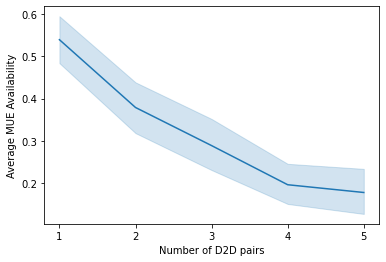

In [3]:
mue_success_rate = np.array(data['mue_success_rate'])
aux = np.ones((mue_success_rate.shape[0], np.prod(mue_success_rate.shape[1:])))
for i in range(len(aux)):
    aux[i] *= i+1
n_d2d = aux.reshape(-1)
aux2 = mue_success_rate.reshape(-1)
# dataframe
df = pd.DataFrame({'success': aux2, 'n_d2d': n_d2d})
# plot
sns.lineplot(x="n_d2d", y="success", data=df)
x_ticks = df['n_d2d'].unique()
x_ticks.sort()
plt.xticks(x_ticks)
plt.ylabel('Average MUE Availability')
plt.xlabel('Number of D2D pairs')

## MUE Spectral Efficiencies

In [4]:
data['mue_sinr_threshold']

6

Text(0.5, 0, 'Number of D2D pairs')

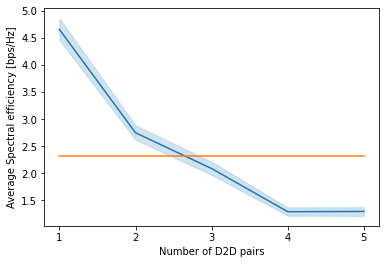

In [5]:
mue_speffs = np.array(data['mue_speffs'])
aux = np.ones((mue_speffs.shape[0], np.prod(mue_speffs.shape[1:])))
for i in range(len(aux)):
    aux[i] *= i+1
n_d2d = aux.reshape(-1)
aux2 = mue_speffs.reshape(-1)

df = pd.DataFrame({'speffs': aux2, 'n_d2d': n_d2d})
df['dummy'] = 'Spectral Efficiency'

speff_threshold = np.log2(1 + db_to_power(data['mue_sinr_threshold'])) 
baseline = speff_threshold * np.ones(mue_speffs.shape[0])

sns.lineplot(x="n_d2d", y="speffs",data=df)

plt.plot(x_ticks, baseline)
x_ticks = df['n_d2d'].unique()
x_ticks.sort()
plt.xticks(x_ticks)
plt.ylabel('Average Spectral efficiency [bps/Hz]')
plt.xlabel('Number of D2D pairs')

In [6]:
mask = mue_success_rate[4] != 1
mue_success_rate[4][mask]

array([0.16, 0.  , 0.  , 0.2 , 0.04, 0.36, 0.  , 0.  , 0.  , 0.04, 0.  ,
       0.32, 0.04, 0.28, 0.  , 0.24, 0.6 , 0.  , 0.16, 0.  , 0.  , 0.16,
       0.68, 0.36, 0.  , 0.52, 0.08, 0.28, 0.2 , 0.  , 0.2 , 0.08, 0.  ,
       0.28, 0.12, 0.  , 0.  , 0.  , 0.88, 0.  , 0.2 , 0.84, 0.  , 0.16,
       0.52, 0.12, 0.  , 0.24, 0.  , 0.  , 0.2 , 0.  , 0.12, 0.  , 0.04,
       0.  , 0.08, 0.08, 0.04, 0.  , 0.72, 0.  , 0.  , 0.96, 0.24, 0.16,
       0.  , 0.  , 0.  , 0.08, 0.  , 0.16, 0.12, 0.  , 0.04, 0.  , 0.24,
       0.  , 0.08, 0.44, 0.04, 0.36, 0.4 , 0.  , 0.12, 0.08, 0.  , 0.12,
       0.  , 0.24, 0.  , 0.04, 0.04, 0.  , 0.12, 0.  ])

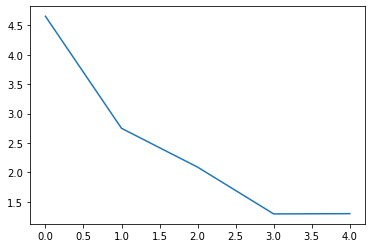

In [7]:
avgs = np.mean(mue_speffs, axis=(1,2))
plt.plot(avgs)

In [8]:
std_mue_success_rate = np.std(mue_success_rate, axis=1).tolist()
mean_mue_speffs = np.mean(mue_success_rate, axis=1).tolist()

## D2D Summed Spectral Efficiencies

Text(0.5, 0, 'Number of D2D pairs')

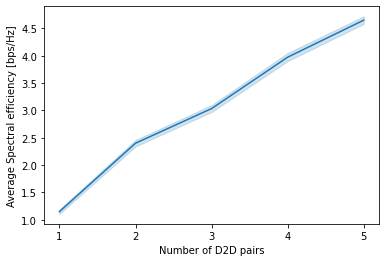

In [9]:
d2d_speffs = np.array(data['d2d_speffs'])
aux = np.ones((d2d_speffs.shape[0], np.prod(d2d_speffs.shape[1:])))
for i in range(len(aux)):
    aux[i] *= i+1
n_d2d = aux.reshape(-1)
aux2 = d2d_speffs.reshape(-1)
# dataframe
df = pd.DataFrame({'speff': aux2, 'n_d2d': n_d2d})
# plot
sns.lineplot(x="n_d2d", y="speff",data=df)
x_ticks = df['n_d2d'].unique()
x_ticks.sort()
plt.xticks(x_ticks)
plt.ylabel('Average Spectral efficiency [bps/Hz]')
plt.xlabel('Number of D2D pairs')

[1.14773478 2.39942879 3.03336907 3.97404476 4.65144425]


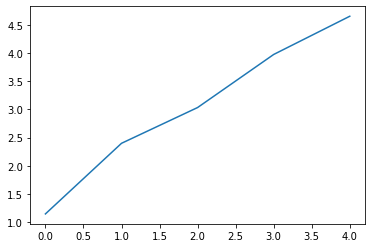

In [10]:
avgs = np.mean(d2d_speffs, axis=(1,2))
print(avgs)
plt.plot(avgs)

## Training data

## Training evaluation rewards

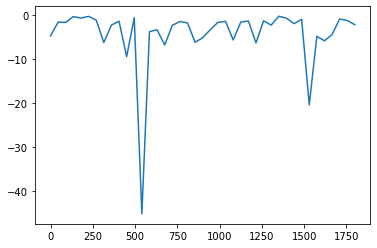

In [11]:
r = data['training_rewards']
t = [(i) * data['eval_every'] for i in range(len(r))]
plt.plot(t,r)

## Training evaluation D2D speffs

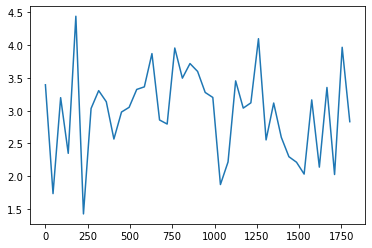

In [12]:
d_speffs = data['training_d2d_speffs']
plt.plot(t, d_speffs)

## Training evaluation MUE speffs

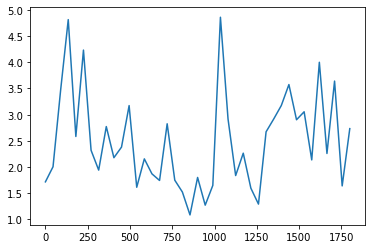

In [13]:
m_speffs = data['training_mue_speffs']
plt.plot(t, m_speffs)

In [14]:
d_speffs

[3.394237257024815,
 1.736604949768564,
 3.1981091619268005,
 2.350250596816623,
 4.4382187368737815,
 1.4274450803374545,
 3.033345386493577,
 3.3053544294797383,
 3.1362014596991497,
 2.567930792261452,
 2.9793631473379087,
 3.050763235474093,
 3.3234581534371186,
 3.3626615373160393,
 3.869162201653168,
 2.8582094479287434,
 2.7963180319011935,
 3.9543083974637923,
 3.495216838076753,
 3.717653380134475,
 3.597675984267291,
 3.277304941932932,
 3.201395206582213,
 1.8747938732982403,
 2.218857466603311,
 3.4535326768117454,
 3.0391738788556166,
 3.119148273279082,
 4.09644298824818,
 2.554818020972761,
 3.1162839720365763,
 2.594239130013342,
 2.298624751781361,
 2.214612086107088,
 2.0341902947791466,
 3.163973151531313,
 2.1400237334467804,
 3.3532823966809997,
 2.027544415735577,
 3.965310227966366,
 2.8321975859295567]